# Photon-photon pair production
Here is an example for plotting various properties of the interaction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cascapy.constants import *
from cascapy.interactions import PairProd
from cascapy.backgrounds import EBL

In [2]:
pp = PairProd()

### Differential cross section
Plot the spectrum of leptons produced by the interaction of a primary gamma ray of various
energies with the EBL+CMB background.

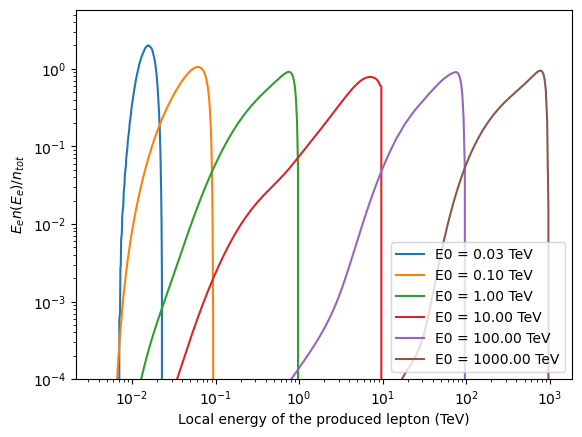

In [3]:
z = 0.

# energies of the primary photon at the interaction site...
for E0 in [30*GeV,100*GeV,1*TeV,10*TeV,100*TeV,1000*TeV ]:
    gmax = E0/mc2
    gmin = np.max([E0/mc2/1.e3,4*GeV/mc2])
    ge0 =  np.logspace(np.log10(gmin),np.log10(gmax),200)
    dg = ge0[1:]-ge0[:-1]
    y = pp.d2n_dt_dge0(ge0,E0*(1+z),z)
    norm  = sum(y[:-1]*dg)
    c1 = plt.loglog(ge0*mc2/TeV,ge0*y/norm,label=f"E0 = {E0/TeV:.2f} TeV")
plt.xlabel('Local energy of the produced lepton (TeV)')
plt.ylabel(r'$E_e n(E_e) / n_{tot}$')
plt.ylim(1.e-4,)
plt.legend()
plt.show()

### Total cross section
Plot the total cross section for energies in the local frame.

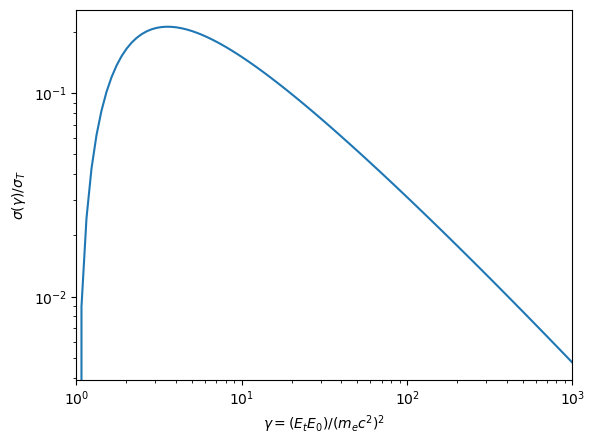

In [4]:
g = np.logspace(0,3,100)
plt.loglog(g,pp.sigma(g)/sigmaT)
plt.xlim(1,1.e3)
plt.xlabel(r"$\gamma = (E_tE_0)/(m_ec^2)^2$")
plt.ylabel(r"$\sigma(\gamma)/\sigma_T$")
plt.show()

### Local absorption
Plot the local absorption seen by a primary photon starting at z=3.5 with local energy E0,as it travels away with time. The energy redshift due to cosmological expansion while travelling is taken into account.

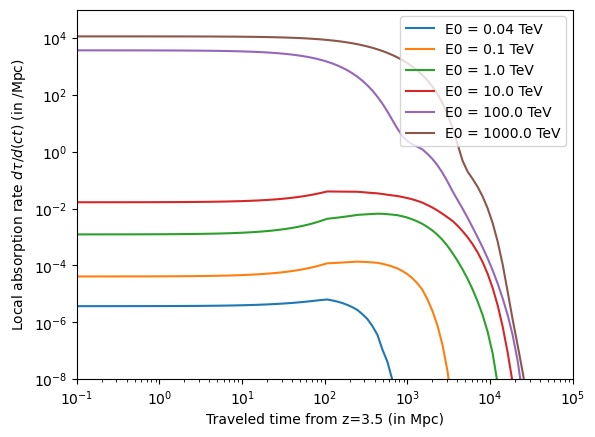

In [5]:
z0 = 3.5
t0 = pp.lcdm.t_z(z0)
dt = np.logspace(-1,5,100)*Mpc/c
dtau = np.zeros_like(dt)

# Primary energy at z=3.5
for E0 in np.array([40*GeV,100*GeV,1*TeV,10*TeV,100*TeV,1.e3*TeV]):
    for i,tt in enumerate(t0+dt):
        dtau[i] = pp.dtau_dt(tt,E0,tinit=t0)
    plt.loglog(dt*c/Mpc,dtau/c*Mpc,label=f'E0 = {E0/TeV} TeV')
plt.ylim(1.e-8,1.e5)
plt.xlim(1.e-1,1.e5)
plt.xlabel('Traveled time from z=3.5 (in Mpc)')
plt.ylabel(r'Local absorption rate $d\tau/d(ct)$ (in /Mpc)')
plt.legend()
plt.show()

### Total optical depth
Plot the cumulative absorption seen by a photon starting at z=3.5 with local energy E0, as it travels away with time. The energy redshift due to cosmological expansion while traveling is taken into account.

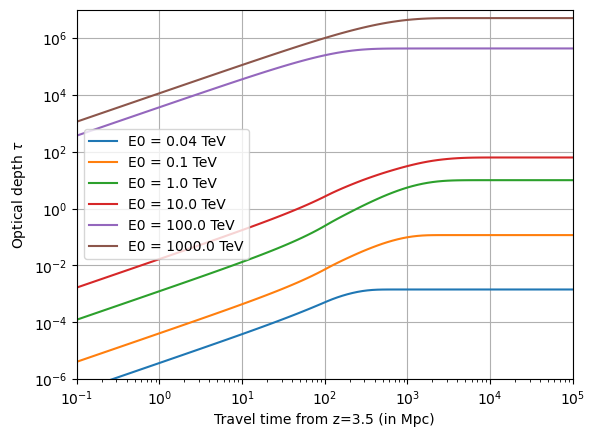

In [6]:
z0 = 3.5

t0 = pp.lcdm.t_z(z0)
tt = t0 + np.logspace(-1,5,100)*Mpc/c
tau = np.zeros_like(tt)
f = pp.lcdm.a_t(t0)/pp.lcdm.a_t(tt)

# Primary energy at z=3.5
for E0 in np.array([40*GeV,100*GeV,1*TeV,10*TeV,100*TeV,1.e3*TeV]):
    tau[0] = pp.dtau(t0,tt[0],E0)
    for i in range(1,len(tt)):
        tau[i] = tau[i-1] + pp.dtau(tt[i-1],tt[i],E0*f[i-1])
    plt.loglog((tt-t0)*c/Mpc,tau,label=f'E0 = {E0/TeV} TeV')
plt.xlabel('Travel time from z=3.5 (in Mpc)')
plt.ylabel(r'Optical depth $\tau$ ')
plt.xlim(1.e-1,1.e5)
plt.ylim(1.e-6,1.e7)
plt.legend()
plt.grid()
plt.show()

### Absorption coefficient
Plot the absorption coefficient vs energy (and compare it to the tabulated one)

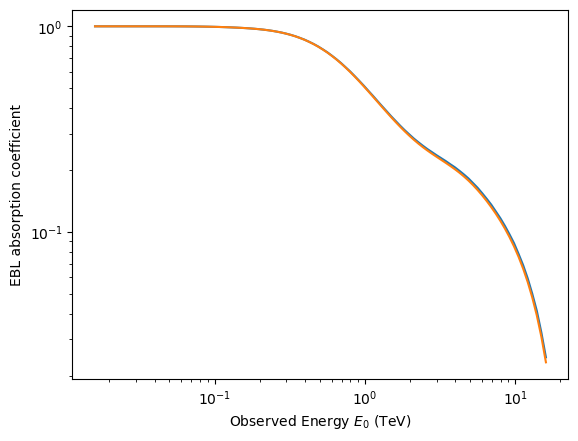

In [7]:
z = 0.1
eee = EBL(z=z)
t = pp.lcdm.t_z(z)

# Energy at z=0
E0 = np.logspace(np.log10(10*GeV),np.log10(10*TeV),100)

# Tabulated values
plt.loglog(E0,eee.fabs(E0),label='From table')

# dtau computed from EBL density (requires primary energy at emission redshift)
plt.loglog(E0,np.exp(-pp.dtau(t,0.,E0*(1+z))),label='Computed')
plt.xlabel(r'Observed Energy $E_0$ (TeV)')
plt.ylabel('EBL absorption coefficient')
plt.show()

### Photon mean free path
Plot the photon mean free path as a function of primary energy for different redshifts

z= 0
z= 0.1
z= 0.5
z= 1
z= 2
z= 3


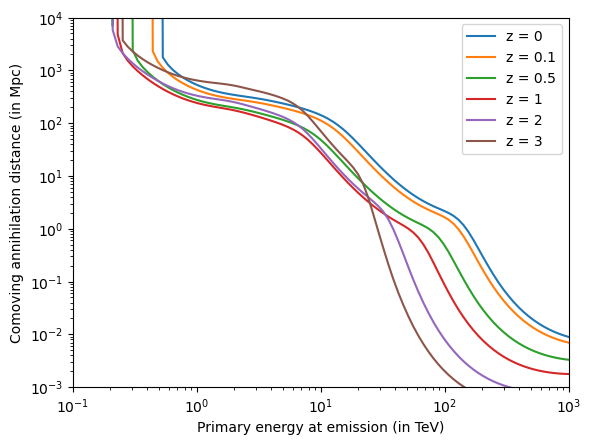

In [10]:
# Energy at emission redshift
E0 = np.logspace(np.log10(0.1*TeV),np.log10(1.e3*TeV),100)

for z in [0,0.1,0.5,1,2,3]:
    print("z=",z)
    t = pp.lcdm.t_z(z)
    plt.loglog(E0/TeV,pp.lmfp(t,E0)/Mpc,label=f"z = {z}")
#        plt.loglog(E0/TeV,c*pp.Tmfp(t,E0)/Mpc,label=f"{z}")

plt.xlabel('Primary energy at emission (in TeV)')
plt.ylabel('Comoving annihilation distance (in Mpc)')
plt.xlim(1.e-1,1.e3)
plt.ylim(1.e-3,1.e4)
plt.legend()
plt.show()